In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('data/diabetes_data_engineered.csv')

In [3]:
df['readmitted'].unique()

array([0, 1])

<Axes: xlabel='readmitted', ylabel='count'>

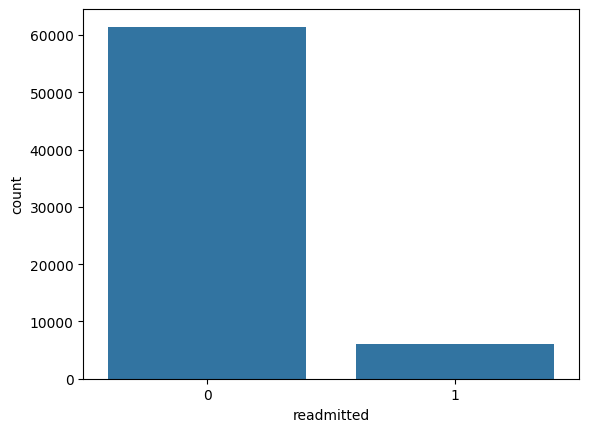

In [4]:
sns.countplot(data = df, x = 'readmitted')

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization', 'numchange', 'level1_diag1', 'level2_diag1',
       'level1_diag2', 'level2_diag2', 'level1_diag3', 'level2_diag3'],
      dtype='object')

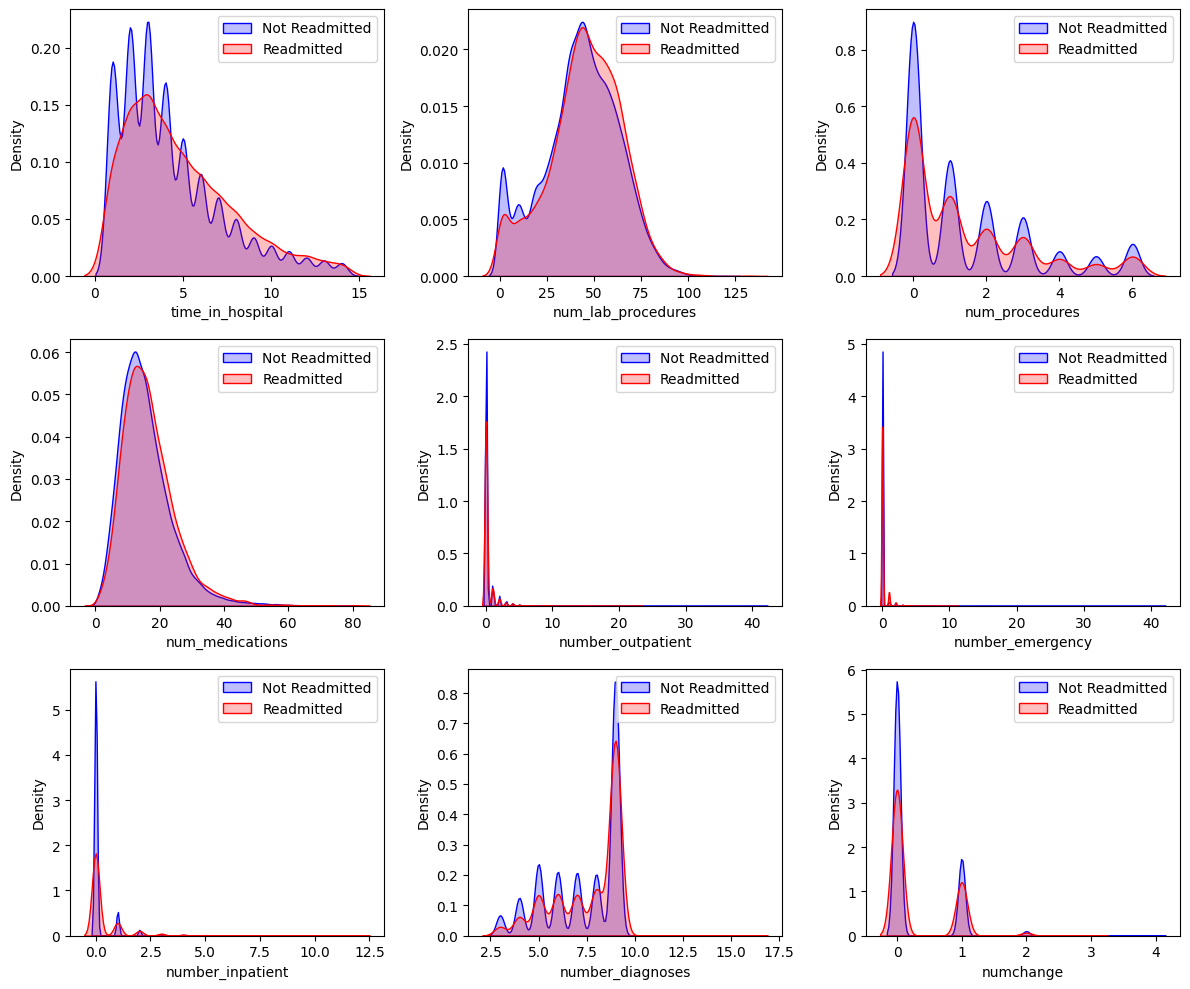

In [6]:
col_kdeplot = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses', 'numchange'
]

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(col_kdeplot):
    sns.kdeplot(df.loc[df['readmitted'] == 0, col], ax=axes[i], color='b', fill=True, label='Not Readmitted')
    sns.kdeplot(df.loc[df['readmitted'] == 1, col], ax=axes[i], color='r', fill=True, label='Readmitted')
    
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()


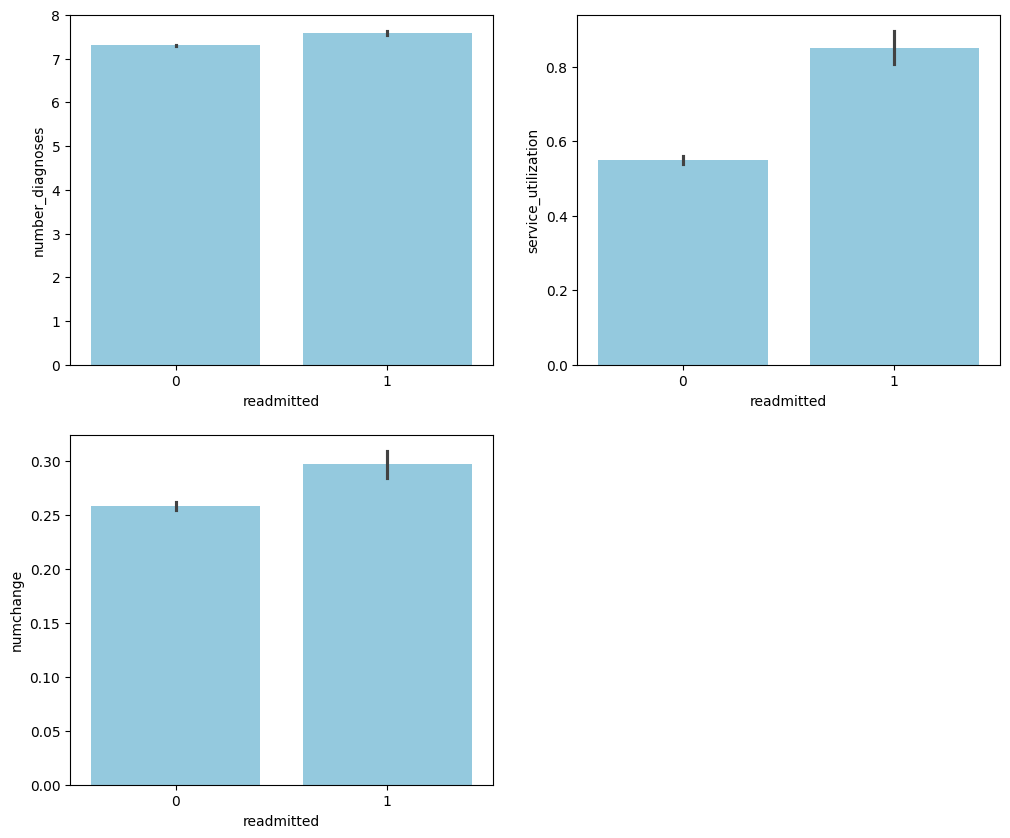

In [7]:
cols_bar = ['number_diagnoses', 'service_utilization', 'numchange']
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes = axes.flatten()

for i, col in enumerate(cols_bar):
    sns.barplot(x = df['readmitted'], y = df[col], ax = axes[i], color='skyblue')

if len(cols_bar) < len(axes):
    axes[len(cols_bar)].set_visible(False)

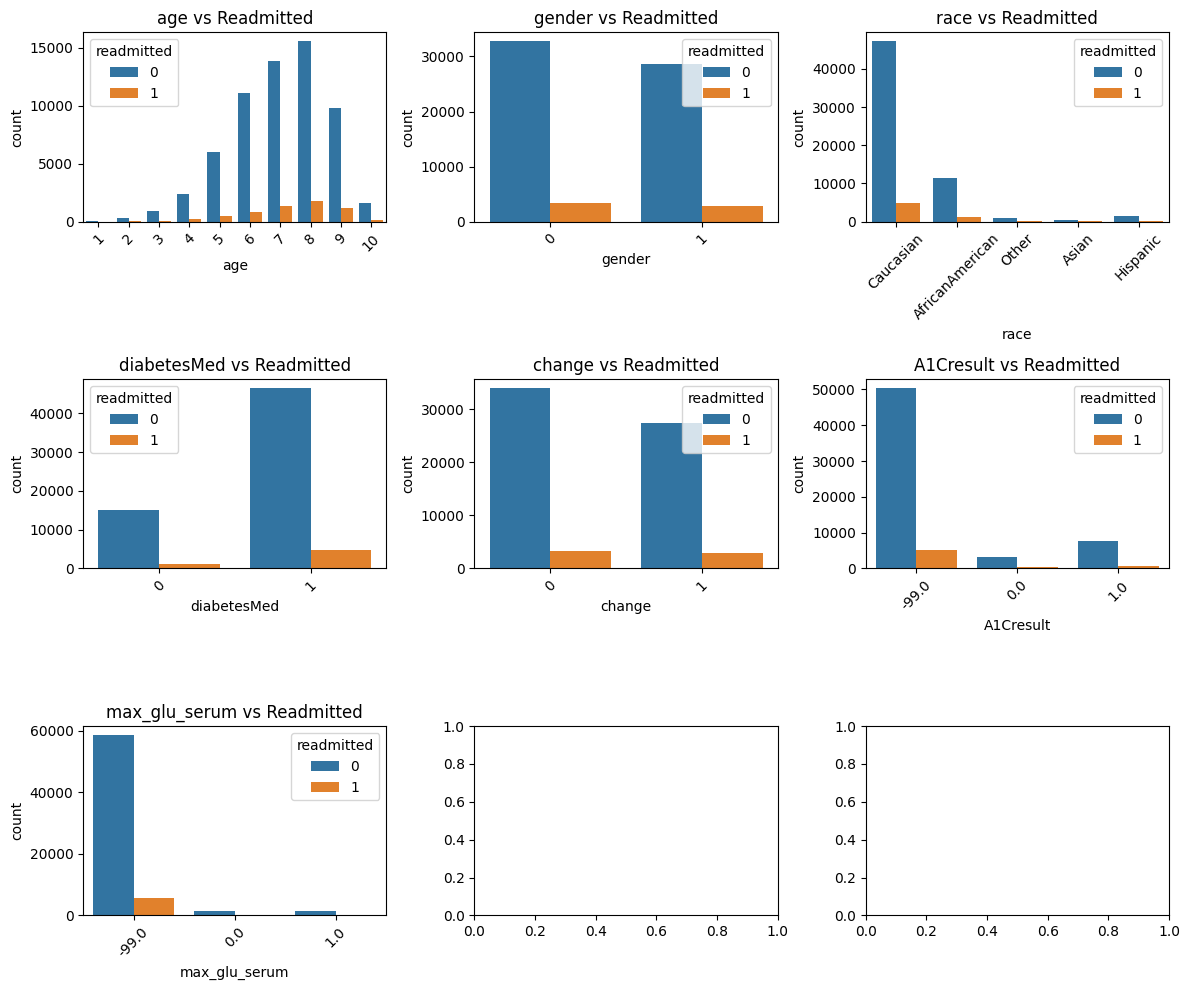

In [8]:
cols_count = ['age', 'gender', 'race', 'diabetesMed', 'change', 'A1Cresult', 'max_glu_serum']

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols_count):
    sns.countplot(data=df, x=col, hue='readmitted', ax=axes[i])
    axes[i].set_title(f'{col} vs Readmitted')
    axes[i].tick_params(axis='x', rotation=45)


# if len(cols_count) < len(axes):
#     axes[len(cols_count)].set_visible(False)

plt.tight_layout()
plt.show()